In [26]:
import numpy as np
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns
from scipy.stats import skew
import scipy.stats as st

In [27]:
df = pd.read_csv('04-maskbeliefs.csv', index_col = 0)

In [28]:
df.head(3)

,Boarding,Age,Gender,ResidentialElder,InteractedElder,Restaurant,PreventSpread,Reason,Public
Timestamp,,,,,,,,,
9/25/2020 15:04:43,Day,16,Female,No,Yes,1.0,Yes,To protect yourself AND others,Yes
9/25/2020 15:04:46,Boarding,17,Male,No,No,2.0,Yes,To protect yourself AND others,Yes
9/25/2020 15:04:58,Boarding,17,Male,No,Yes,0.0,Yes,To protect yourself AND others,Yes


# Renombramos las columnas para tener buenos nombres y claros

In [29]:
lista_columnas = {col: col.strip().replace(" ", "_").lower() for col in df.columns}
df.rename(columns=lista_columnas, inplace=True)
df.head(2)

,boarding,age,gender,residentialelder,interactedelder,restaurant,preventspread,reason,public
Timestamp,,,,,,,,,
9/25/2020 15:04:43,Day,16,Female,No,Yes,1.0,Yes,To protect yourself AND others,Yes
9/25/2020 15:04:46,Boarding,17,Male,No,No,2.0,Yes,To protect yourself AND others,Yes


In [30]:
print("El dataframe tiene filas y columnas, respectivamente:", df.shape)

El dataframe tiene filas y columnas, respectivamente: (107, 9)


In [31]:
df.isnull().sum()

boarding            0
age                 0
gender              1
residentialelder    0
interactedelder     0
restaurant          2
preventspread       0
reason              0
public              0
dtype: int64

In [32]:
print("El dataframe tiene", df.duplicated().sum(), "duplicados.")

El dataframe tiene 18 duplicados.


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 9/25/2020 15:04:43 to 9/29/2020 9:56:52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   boarding          107 non-null    object 
 1   age               107 non-null    int64  
 2   gender            106 non-null    object 
 3   residentialelder  107 non-null    object 
 4   interactedelder   107 non-null    object 
 5   restaurant        105 non-null    float64
 6   preventspread     107 non-null    object 
 7   reason            107 non-null    object 
 8   public            107 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 8.4+ KB


In [34]:
df.columns

Index(['boarding', 'age', 'gender', 'residentialelder', 'interactedelder',
       'restaurant', 'preventspread', 'reason', 'public'],
      dtype='object')

In [35]:
df.columns = ['embarque',
                'edad',
                'genero',
                'reside_con_anciano',
                'interactua_con_anciano',
                'restaurante',
                'prevenir_la_propagacion',
                'razon',
                'publico']

In [36]:
df.columns

Index(['embarque', 'edad', 'genero', 'reside_con_anciano',
       'interactua_con_anciano', 'restaurante', 'prevenir_la_propagacion',
       'razon', 'publico'],
      dtype='object')

# lo traducimos para enterarnos mejor

In [37]:
df.shape

(107, 9)

In [38]:
#variables cuantitativas
edad = df['edad']
restaurante = df['restaurante']


In [39]:
# variables cualitativas
genero = df['genero']
reside = df['reside_con_anciano']
prevenir = df['prevenir_la_propagacion']

Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.

Contestad a las preguntas planteadas usando los principales estadísticos que hemos aprendid 
y gráficas que mejor se ajusten.

Preguntas:
- 

¿quién previene más la enfermedad por genero? 

In [40]:
df_p=df.groupby('genero')['prevenir_la_propagacion'].count()
df_p

genero
Female    58
Male      46
Other      2
Name: prevenir_la_propagacion, dtype: int64

Las mujeres

¿ y por edad?

In [41]:
df_e = df.groupby('edad')['prevenir_la_propagacion'].count()
df_e

edad
12     1
14    13
15    23
16    30
17    29
18    11
Name: prevenir_la_propagacion, dtype: int64

Los de 16 años

# Hacemos una grafica de si previenen por edad

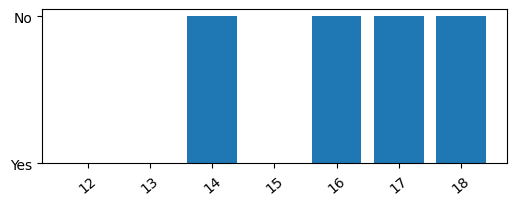

In [42]:
plt.figure(figsize=(6,2))
plt.bar(edad, prevenir)
plt.xticks(rotation=40)
plt.show;

Hacer un boxplot para ver la relación entre la edad y la prevención

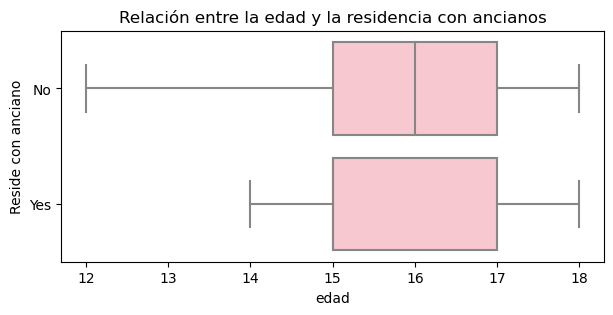

In [43]:
plt.figure(figsize =(7,3))
fig = sns.boxplot(x=edad, y= reside, color=  "pink")
fig.set(xlabel='edad', ylabel= 'Reside con anciano' )
fig.set_title('Relación entre la edad y la residencia con ancianos')
plt.show()

In [44]:
media = np.mean(edad)
print (f'La media de edad es {media}')

La media de edad es 15.981308411214954


In [45]:
moda, frecuencia = stats.mode(edad)
print (f'La moda y la frecuencia son {moda, frecuencia}')

La moda y la frecuencia son (array([16]), array([30]))


[Text(0, 0, 'To protect yourself AND others'),
 Text(1, 0, 'To protect other people'),
 Text(2, 0, 'Because you are required to'),
 Text(3, 0, 'To protect yourself'),
 Text(4, 0, "To protect others but also because I'm required to")]

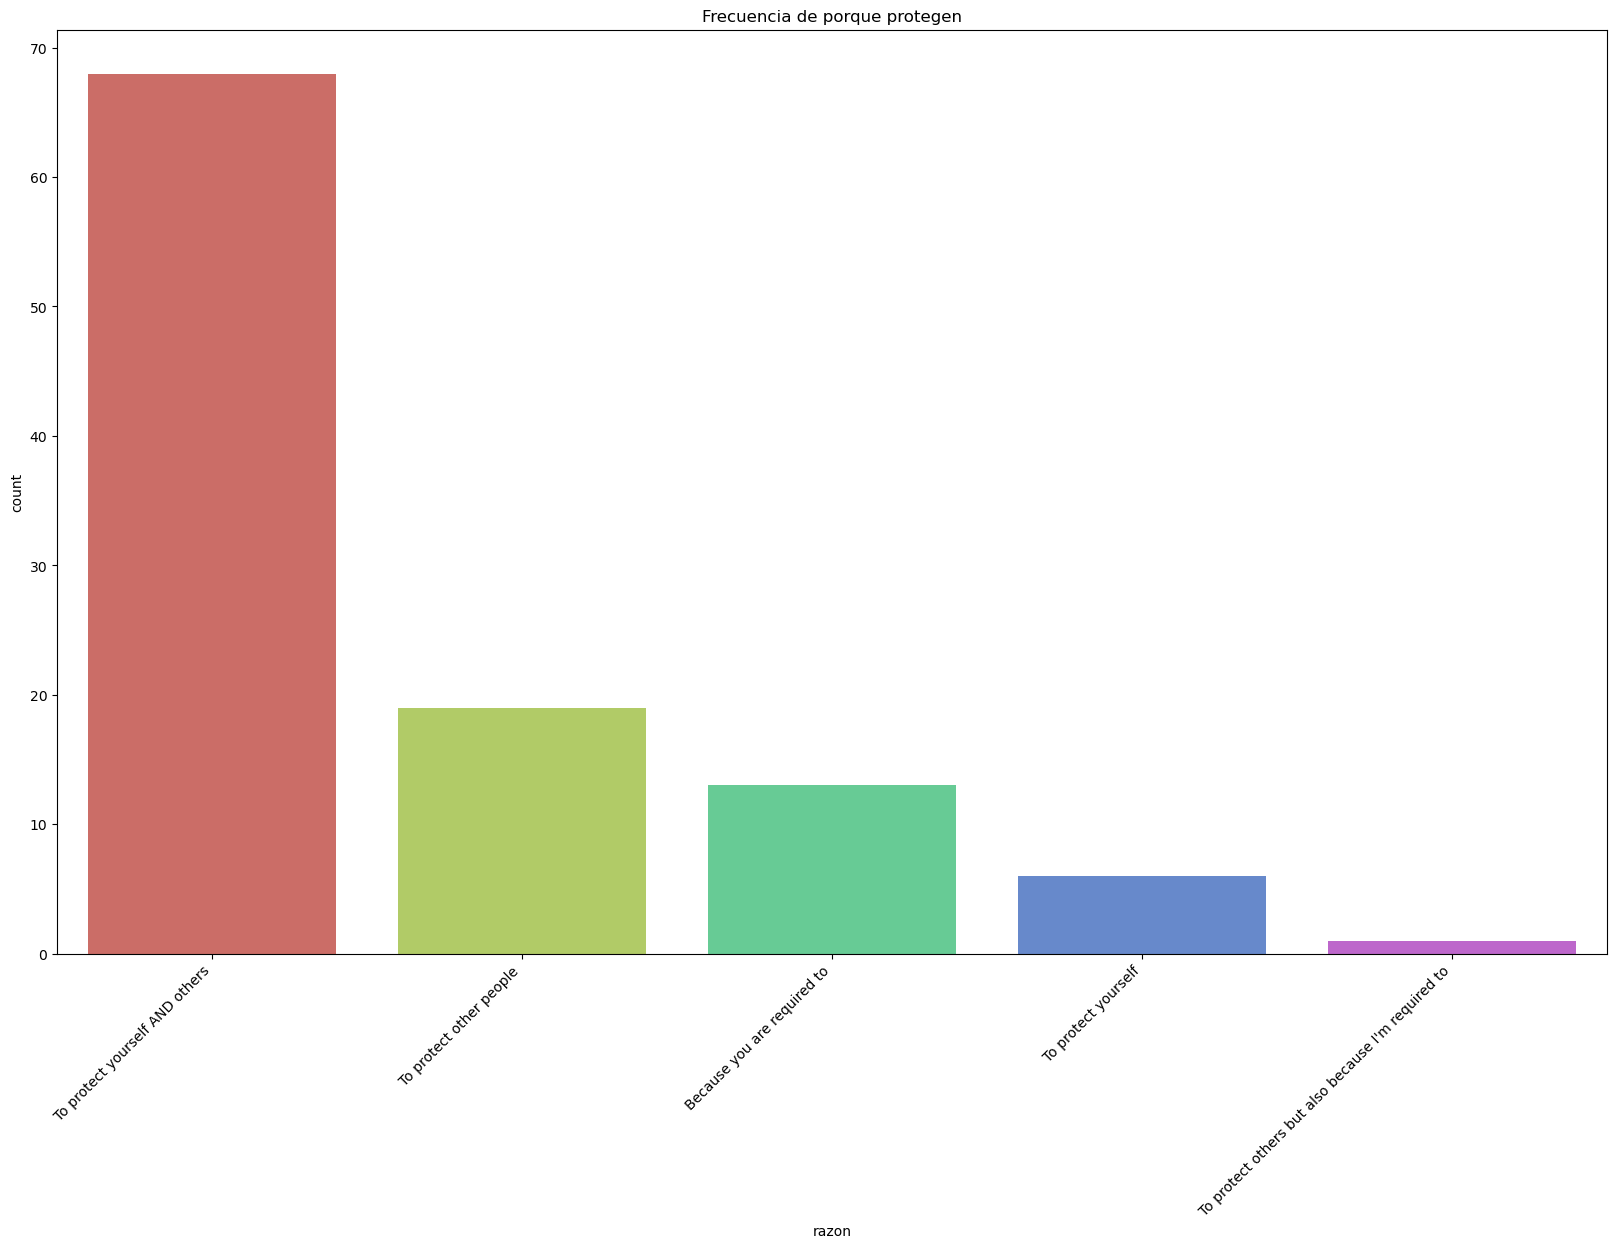

In [46]:
# Vamos a hacer un countplot para visualizarlo
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Frecuencia de porque protegen')
sns.countplot(x = 'razon', data= df, palette = 'hls')
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [47]:
data_crosstab = pd.crosstab(genero, 
                            prevenir) 
print(data_crosstab) 

prevenir_la_propagacion  No  Yes
genero                          
Female                    5   53
Male                      2   44
Other                     0    2


De lo que deducimos que mas mujeres previenen la enfermedad.

In [48]:
skewness = skew(edad)
print(skewness)

-0.31928907046294486


Con este numero podemos decir que nuestros datos estan sesgados a la izquierda, aunque si vemos los datos, en realidad, no es asi, es que solo tenemos edades bajas.

In [49]:
intervalo =(st.t.interval(alpha=0.65, df=len(edad)-1, loc=np.mean(edad), scale=st.sem(edad)))

In [ ]:
print(f'Nuestro intervalo de confianza al 95% es{intervalo}',
f'La media de edad es {media}',
('Lo que nos indica que esta media esta dentro de nuestro intervalo'),
f'La moda de nuestros datos es {moda}')

Nuestro intervalo de confianza al 95% es(15.868440246028253, 16.094176576401654) La media de edad es 15.981308411214954 Lo que nos indica que esta media esta dentro de nuestro intervalo La moda de nuestros datos es [16]
